# Data Visualization Assignment - 1

Submitted By : GOK


Statistical Analysis of Apple Stock Closing Prices:
-------------------------------------------------
Mean Price: $114.77
Median Price: $101.09
Mode Price: $97.34
Standard Deviation: $60.65
Variance: $3678.47


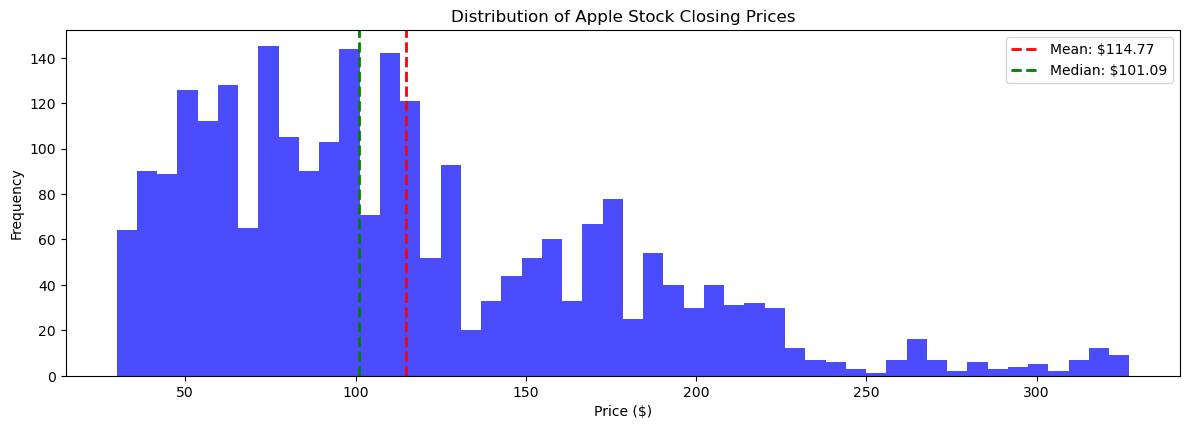

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\venka\Documents\Projects\dv\aapl\HistoricalQuotes.csv")

# Clean up column names by removing leading/trailing spaces
data.columns = data.columns.str.strip()

# Remove dollar signs and convert 'Close/Last' to a numeric type
data['Close/Last'] = data['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the mean, median, mode, and standard deviation of the 'Close/Last' prices
mean_close = np.mean(data['Close/Last'])
median_close = np.median(data['Close/Last'])
mode_close = data['Close/Last'].mode()[0]  # Taking the first mode in case of multiple modes
std_dev_close = np.std(data['Close/Last'])

# Calculate statistical measures
mean_price = np.mean(data['Close/Last'])
median_price = np.median(data['Close/Last'])
mode_price = data['Close/Last'].mode()[0]
std_dev_price = np.std(data['Close/Last'])
variance_price = np.var(data['Close/Last'])

# Print statistical analysis
print("\nStatistical Analysis of Apple Stock Closing Prices:")
print("-------------------------------------------------")
print(f"Mean Price: ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"Mode Price: ${mode_price:.2f}")
print(f"Standard Deviation: ${std_dev_price:.2f}")
print(f"Variance: ${variance_price:.2f}")

# Create visualizations
plt.figure(figsize=(12, 8))

# Histogram of closing prices
plt.subplot(2, 1, 1)
plt.hist(data['Close/Last'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Apple Stock Closing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: ${median_price:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# 2.Develop a code to perform basic to advanced operation using both Numpy and Pandas using TikTok video performance dataset

Data loaded successfully!

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Video_ID        5 non-null      int64 
 1   User_ID         5 non-null      int64 
 2   Username        5 non-null      object
 3   Video_Title     5 non-null      object
 4   Category        5 non-null      object
 5   Likes           5 non-null      int64 
 6   Comments        5 non-null      int64 
 7   Shares          5 non-null      int64 
 8   Views           5 non-null      int64 
 9   Upload_Date     5 non-null      object
 10  Video_Length    5 non-null      int64 
 11  Hashtags        5 non-null      object
 12  User_Followers  5 non-null      int64 
 13  User_Following  5 non-null      int64 
 14  User_Likes      5 non-null      int64 
dtypes: int64(10), object(5)
memory usage: 732.0+ bytes
None

Descriptive Statistics:
         Video_ID  

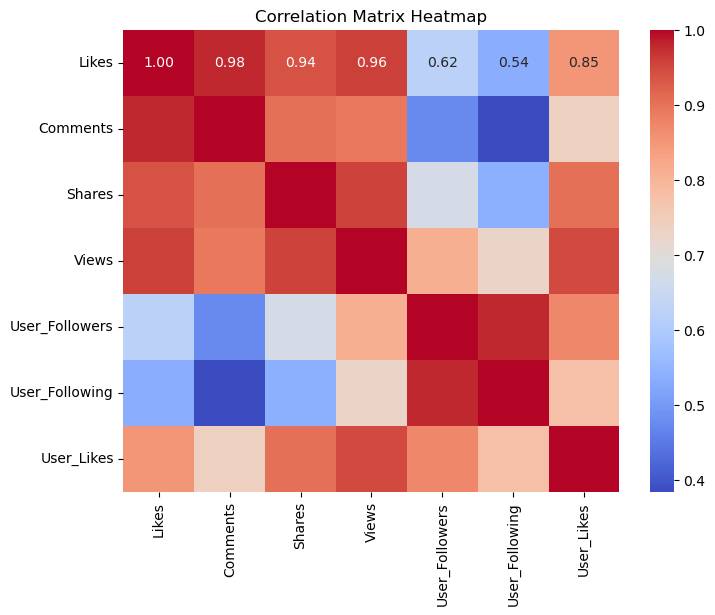


Average Engagement Rate per Category:
Category
Comedy      0.042614
Dance       0.050311
Tutorial    0.040000
Name: Engagement_Rate, dtype: float64

Top 5 Videos with Highest Engagement Rate:
       Video_Title  Engagement_Rate
3      Viral Dance         0.062222
4    Comedy Sketch         0.043800
1       Funny Skit         0.041429
2         Tutorial         0.040000
0  Dance Challenge         0.038400


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


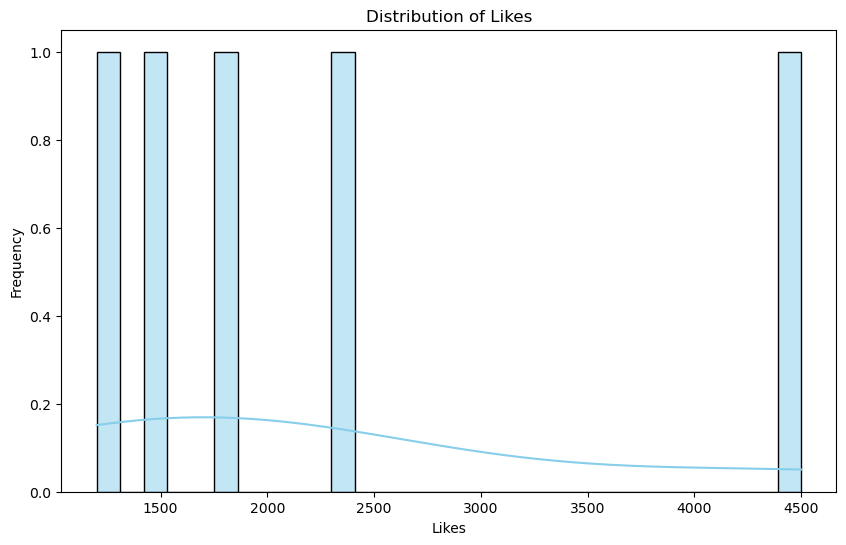


Updated dataset saved as 'C:\Users\venka\Documents\Projects\dv\aapl\tiktok_performance.csv'


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load dataset with error handling
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Function to display basic dataset information
def display_basic_info(data):
    print("\nBasic Information:")
    print(data.info())
    print("\nDescriptive Statistics:")
    print(data.describe())

# Function to calculate total likes and comments
def total_likes_comments(data):
    total_likes = np.sum(data['Likes'])
    total_comments = np.sum(data['Comments'])
    print(f"\nTotal Likes: {total_likes}")
    print(f"Total Comments: {total_comments}")

# Function to calculate mean views per category
def mean_views_per_category(data):
    mean_views_category = data.groupby('Category')['Views'].mean()
    print("\nMean Views per Category:")
    print(mean_views_category)

# Function to find the most liked video
def most_liked_video(data):
    most_liked = data.loc[data['Likes'].idxmax()]
    print("\nMost Liked Video:")
    print(f"Video Title: {most_liked['Video_Title']}, Likes: {most_liked['Likes']}")

# Function to calculate engagement rate and add it as a new column
def calculate_engagement_rate(data):
    data['Engagement_Rate'] = (data['Likes'] + data['Comments'] + data['Shares']) / data['Views']
    print("\nEngagement Rate (Top 5 rows):")
    print(data[['Video_Title', 'Engagement_Rate']].head())

# Function to normalize 'User_Followers' using Min-Max scaling
def normalize_followers(data):
    data['Normalized_Followers'] = (data['User_Followers'] - data['User_Followers'].min()) / (data['User_Followers'].max() - data['User_Followers'].min())
    print("\nNormalized Followers (Top 5 rows):")
    print(data[['Username', 'User_Followers', 'Normalized_Followers']].head())

# Function to calculate and display correlation matrix
def display_correlation_matrix(data):
    correlation_matrix = data[['Likes', 'Comments', 'Shares', 'Views', 'User_Followers', 'User_Following', 'User_Likes']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Visualization: Heatmap of correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Function to calculate average engagement rate per category
def avg_engagement_rate_per_category(data):
    avg_engagement_rate = data.groupby('Category')['Engagement_Rate'].mean()
    print("\nAverage Engagement Rate per Category:")
    print(avg_engagement_rate)

# Function to find top 5 videos with the highest engagement rate
def top_videos_by_engagement_rate(data):
    top_videos = data.nlargest(5, 'Engagement_Rate')[['Video_Title', 'Engagement_Rate']]
    print("\nTop 5 Videos with Highest Engagement Rate:")
    print(top_videos)

# Function to save the updated dataset
def save_updated_data(data, file_path):
    data.to_csv(file_path, index=False)
    print(f"\nUpdated dataset saved as '{file_path}'")

# Function to visualize likes distribution
def visualize_likes_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Likes'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Likes')
    plt.xlabel('Likes')
    plt.ylabel('Frequency')
    plt.show()

# Main script
file_path = r'C:\Users\venka\Documents\Projects\dv\aapl\tiktok_performance.csv'
tiktok_data = load_data(file_path)

if tiktok_data is not None:
    display_basic_info(tiktok_data)
    total_likes_comments(tiktok_data)
    mean_views_per_category(tiktok_data)
    most_liked_video(tiktok_data)
    calculate_engagement_rate(tiktok_data)
    normalize_followers(tiktok_data)
    display_correlation_matrix(tiktok_data)
    avg_engagement_rate_per_category(tiktok_data)
    top_videos_by_engagement_rate(tiktok_data)
    visualize_likes_distribution(tiktok_data)

    # Save the updated dataset
    save_updated_data(tiktok_data, r'C:\Users\venka\Documents\Projects\dv\aapl\tiktok_performance.csv')


# Develop a code using Matplotlib performing all Pyplot basics operation basic text and legend using Agriculture crop yield data set

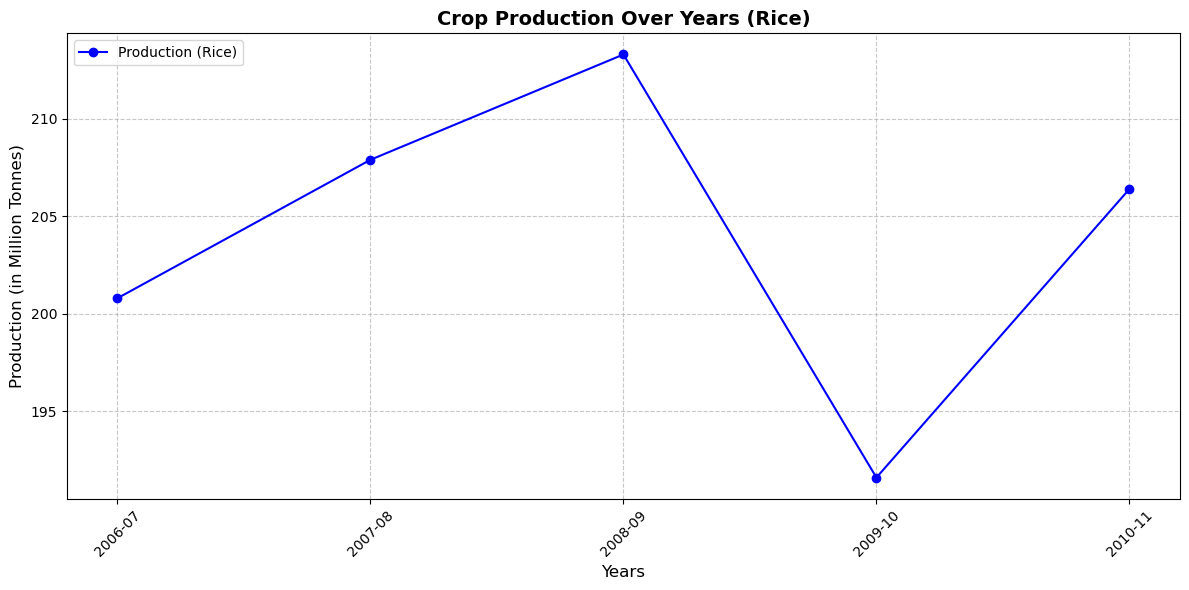

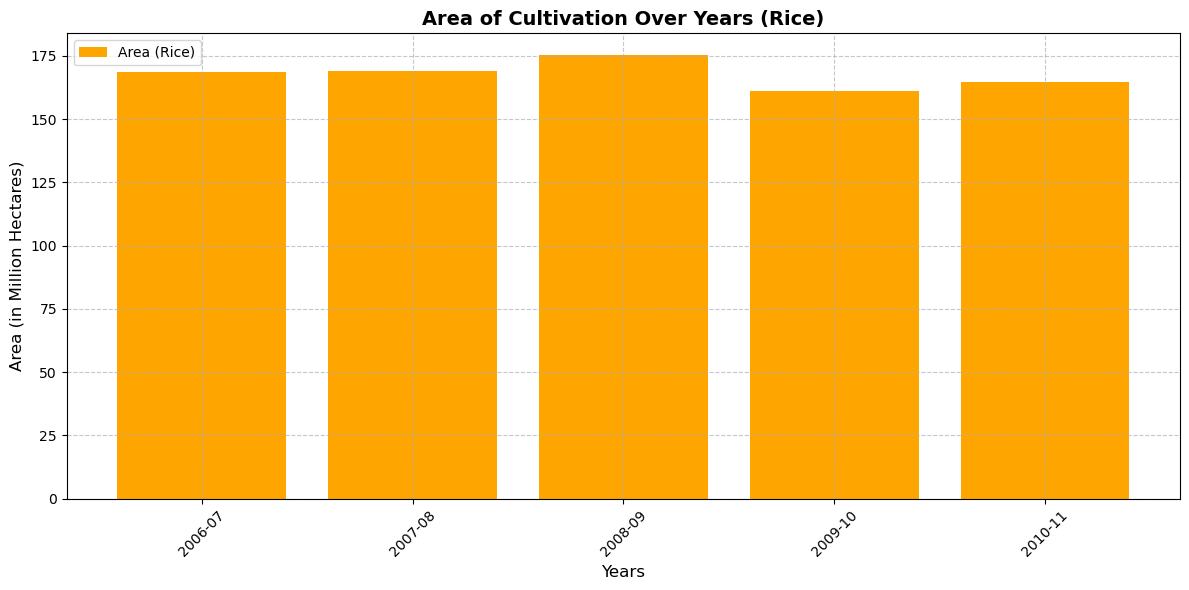

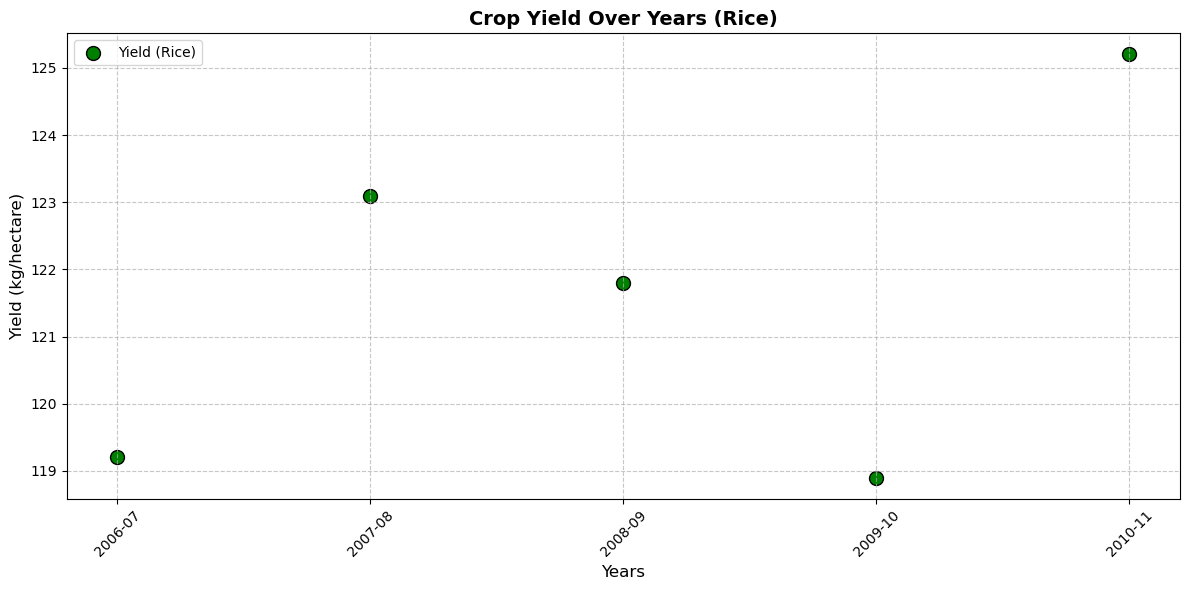

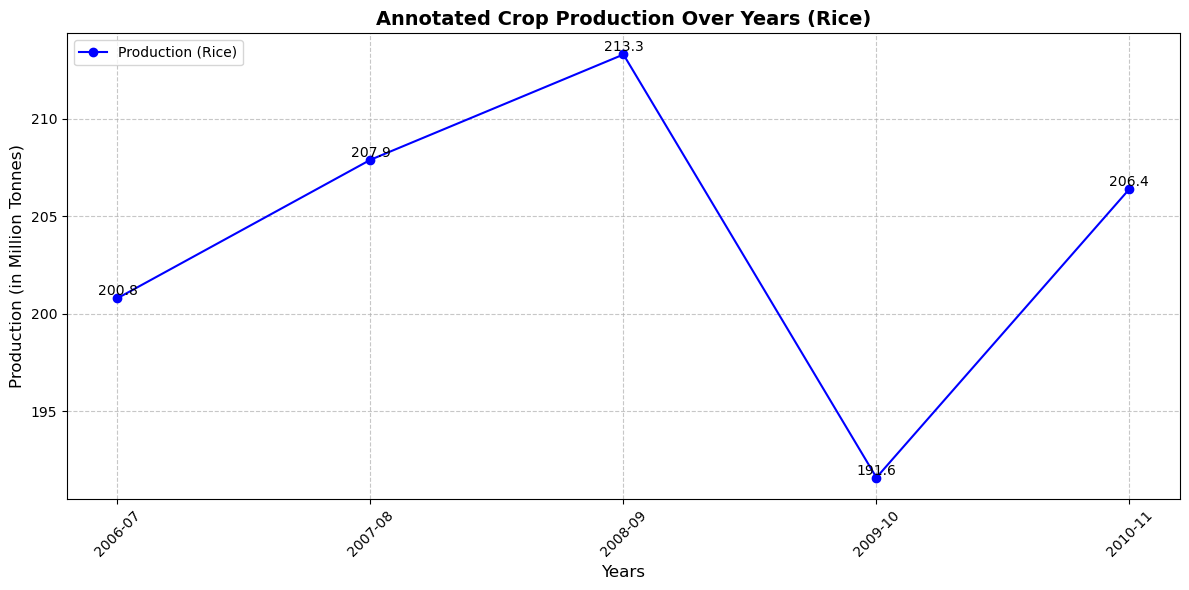

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
agri_data = pd.read_csv(r'C:\Users\venka\Documents\Projects\dv\aapl\datafile (2).csv')
agri_data.columns = agri_data.columns.str.strip()  # Strip spaces from column names
agri_data['Crop'] = agri_data['Crop'].str.strip()  # Clean crop names

# Set up years and crop data
years = ['2006-07', '2007-08', '2008-09', '2009-10', '2010-11']
crop = 'Rice'

# Extract data dynamically for the selected crop
production_data = agri_data.loc[agri_data['Crop'] == crop, [f'Production {year}' for year in years]].values[0]
area_data = agri_data.loc[agri_data['Crop'] == crop, [f'Area {year}' for year in years]].values[0]
yield_data = agri_data.loc[agri_data['Crop'] == crop, [f'Yield {year}' for year in years]].values[0]

# Function to handle repeated plot settings
def plot_setup(title, xlabel, ylabel):
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

# Plot 1: Line Plot for Production over Years
plt.figure(figsize=(12, 6))
plt.plot(years, production_data, label=f'Production ({crop})', marker='o', color='b')
plot_setup(f'Crop Production Over Years ({crop})', 'Years', 'Production (in Million Tonnes)')
plt.show()

# Plot 2: Bar Plot for Area Over Years
plt.figure(figsize=(12, 6))
plt.bar(years, area_data, color='orange', label=f'Area ({crop})')
plot_setup(f'Area of Cultivation Over Years ({crop})', 'Years', 'Area (in Million Hectares)')
plt.show()

# Plot 3: Scatter Plot for Yield Over Years
plt.figure(figsize=(12, 6))
plt.scatter(years, yield_data, color='green', label=f'Yield ({crop})', s=100, edgecolor='black')
plot_setup(f'Crop Yield Over Years ({crop})', 'Years', 'Yield (kg/hectare)')
plt.show()

# Plot 4: Line Plot with Annotations for Production
plt.figure(figsize=(12, 6))
plt.plot(years, production_data, label=f'Production ({crop})', marker='o', color='b')
plot_setup(f'Annotated Crop Production Over Years ({crop})', 'Years', 'Production (in Million Tonnes)')
for i, value in enumerate(production_data):
    plt.text(years[i], value, f'{value}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()


# 3.Develop a code to plot different comparison plots and composition plots considering any suitable dataset

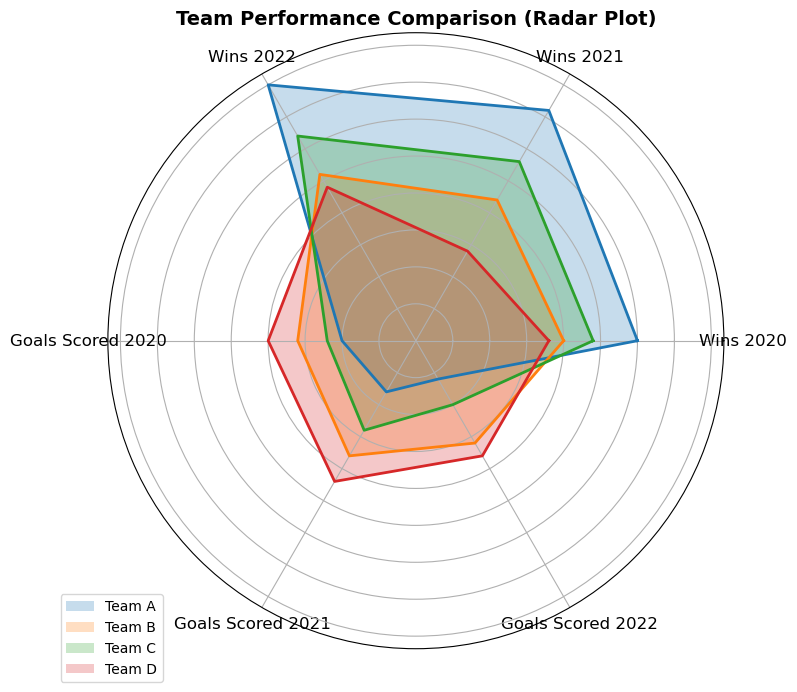

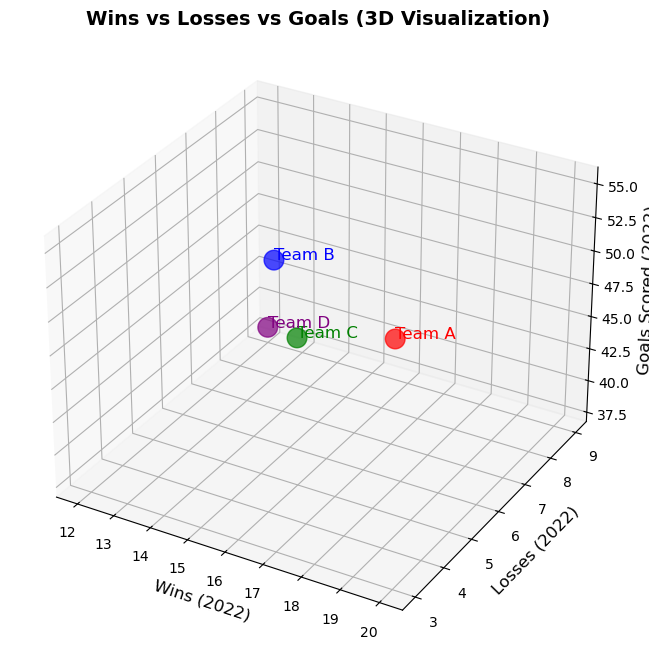

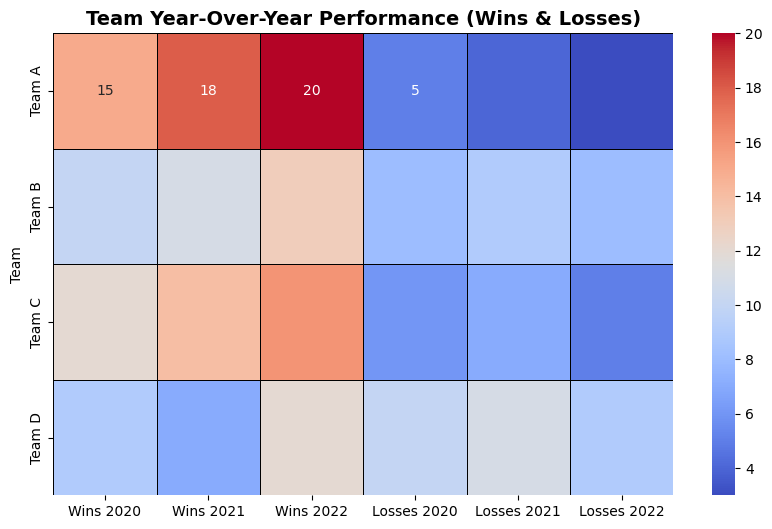

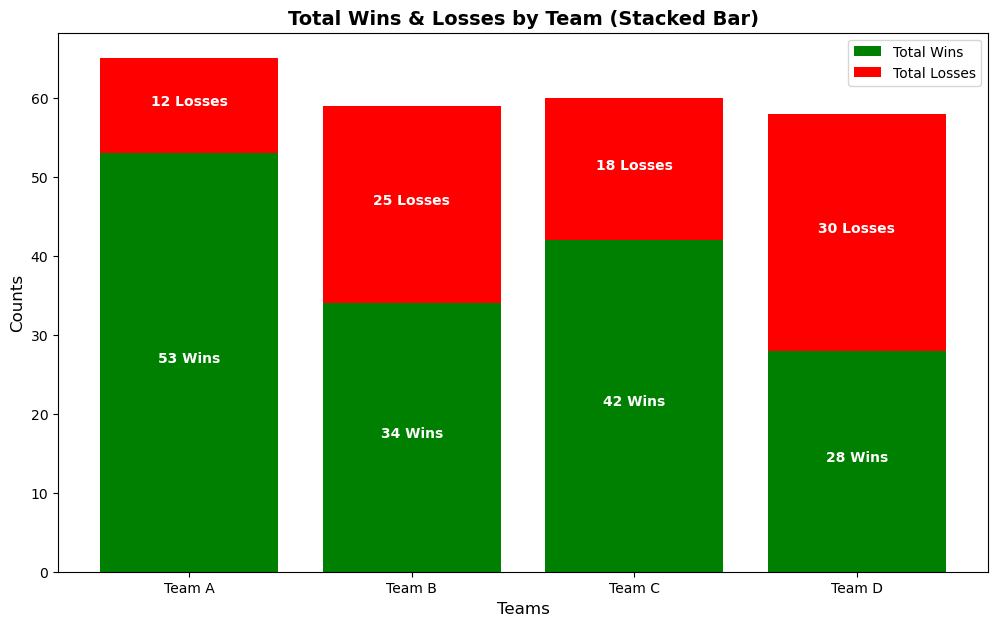

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from mpl_toolkits.mplot3d import Axes3D

# Sample sports team performance data for the demo
data = {
    'Team': ['Team A', 'Team B', 'Team C', 'Team D'],
    'Wins 2020': [15, 10, 12, 9],
    'Wins 2021': [18, 11, 14, 7],
    'Wins 2022': [20, 13, 16, 12],
    'Losses 2020': [5, 8, 6, 10],
    'Losses 2021': [4, 9, 7, 11],
    'Losses 2022': [3, 8, 5, 9],
    'Goals Scored 2020': [45, 38, 40, 35],
    'Goals Scored 2021': [50, 42, 44, 30],
    'Goals Scored 2022': [55, 46, 48, 38]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Step 1: Radar Plot (Spider Plot) for Team Performance Comparison
def radar_plot(df):
    categories = ['Wins 2020', 'Wins 2021', 'Wins 2022', 'Goals Scored 2020', 'Goals Scored 2021', 'Goals Scored 2022']
    num_vars = len(categories)
    
    # Create a figure for radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Create a radar plot for each team
    for i, row in df.iterrows():
        values = row[1:].tolist()  # Get team stats
        values = values[:num_vars]  # Ensure we only take the number of variables we want
        values += values[:1]  # Close the loop
        angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
        angles += angles[:1]  # Close the loop for angles

        ax.fill(angles, values, alpha=0.25, label=row['Team'])
        ax.plot(angles, values, linewidth=2)

    ax.set_yticklabels([])  # Hide radial labels
    plt.xticks(angles[:-1], categories, color='black', size=12)
    plt.title("Team Performance Comparison (Radar Plot)", size=14, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

radar_plot(df)

# Step 2: 3D Plot for Wins vs Losses vs Goals
def three_d_plot(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = df['Wins 2022']
    y = df['Losses 2022']
    z = df['Goals Scored 2022']
    colors = ['red', 'blue', 'green', 'purple']

    # Create a 3D scatter plot
    ax.scatter(x, y, z, c=colors, s=200, alpha=0.7)

    # Labels and customization
    ax.set_xlabel('Wins (2022)', fontsize=12)
    ax.set_ylabel('Losses (2022)', fontsize=12)
    ax.set_zlabel('Goals Scored (2022)', fontsize=12)
    plt.title('Wins vs Losses vs Goals (3D Visualization)', fontsize=14, fontweight='bold')

    for i, team in enumerate(df['Team']):
        ax.text(x[i], y[i], z[i], team, fontsize=12, color=colors[i])

    plt.show()

three_d_plot(df)

# Step 3: Heatmap for Year-over-Year Performance
def heatmap(df):
    year_columns = ['Wins 2020', 'Wins 2021', 'Wins 2022', 'Losses 2020', 'Losses 2021', 'Losses 2022']
    year_data = df.set_index('Team')[year_columns]

    plt.figure(figsize=(10, 6))
    sns.heatmap(year_data, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
    plt.title("Team Year-Over-Year Performance (Wins & Losses)", fontsize=14, fontweight='bold')
    plt.show()

heatmap(df)

# Step 4: Advanced Stacked Bar with Annotations
def stacked_bar_with_annotation(df):
    plt.figure(figsize=(12, 7))
    wins = df[['Wins 2020', 'Wins 2021', 'Wins 2022']].sum(axis=1)
    losses = df[['Losses 2020', 'Losses 2021', 'Losses 2022']].sum(axis=1)

    plt.bar(df['Team'], wins, label='Total Wins', color='green')
    plt.bar(df['Team'], losses, label='Total Losses', color='red', bottom=wins)

    for i, team in enumerate(df['Team']):
        plt.text(i, wins[i] / 2, f'{wins[i]} Wins', ha='center', color='white', fontweight='bold')
        plt.text(i, wins[i] + losses[i] / 2, f'{losses[i]} Losses', ha='center', color='white', fontweight='bold')

    plt.title('Total Wins & Losses by Team (Stacked Bar)', fontsize=14, fontweight='bold')
    plt.xlabel('Teams', fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.legend()
    plt.show()

stacked_bar_with_annotation(df)


# 4.Develop a code to perform Matplotlib functions to display all the basic plots

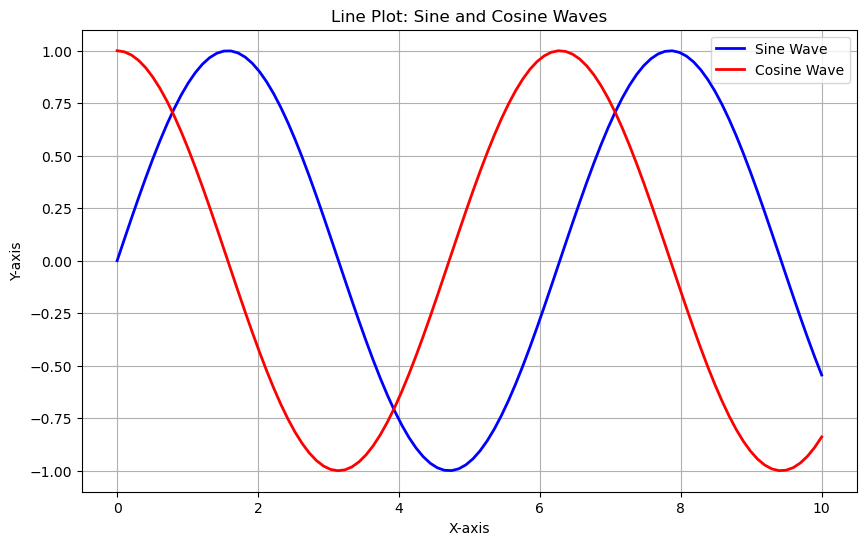

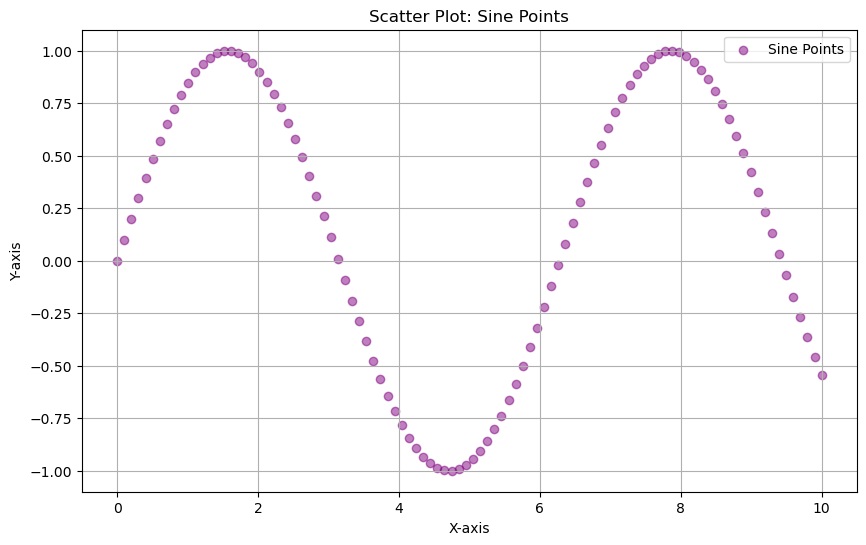

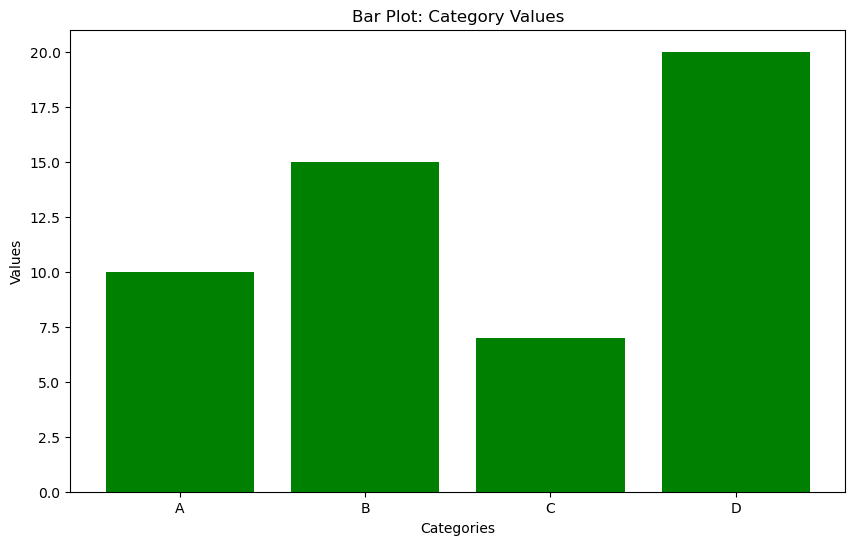

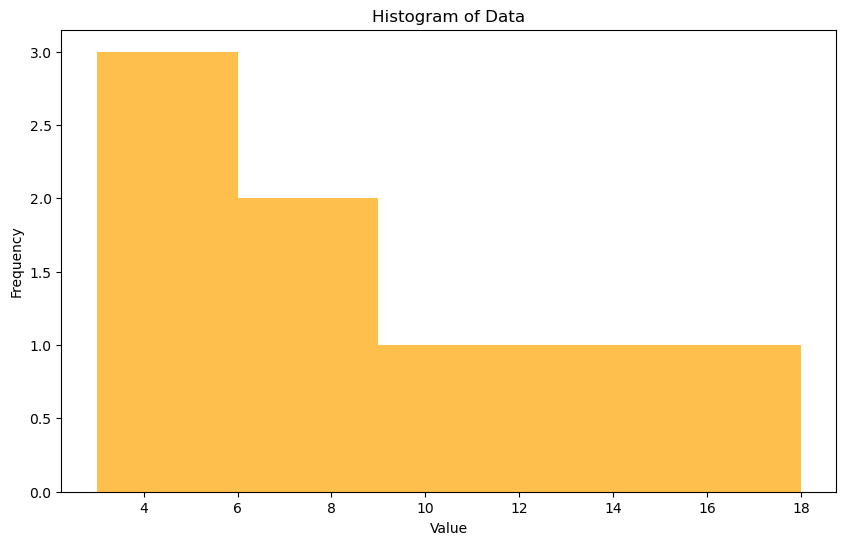

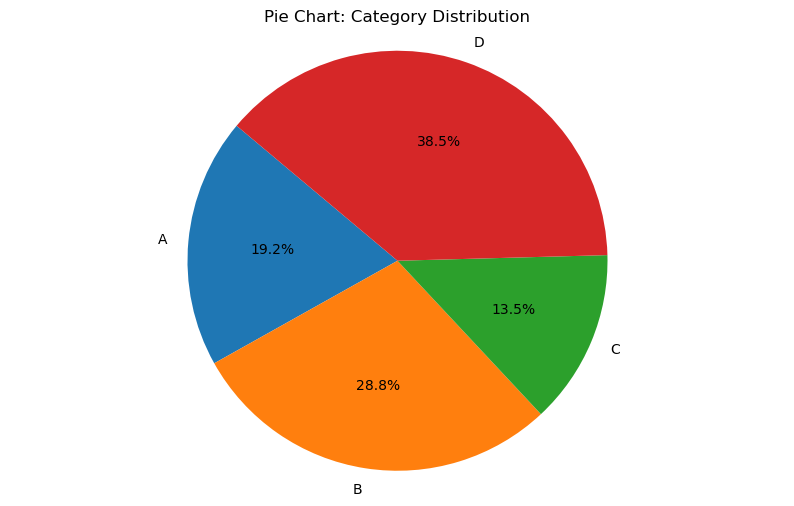

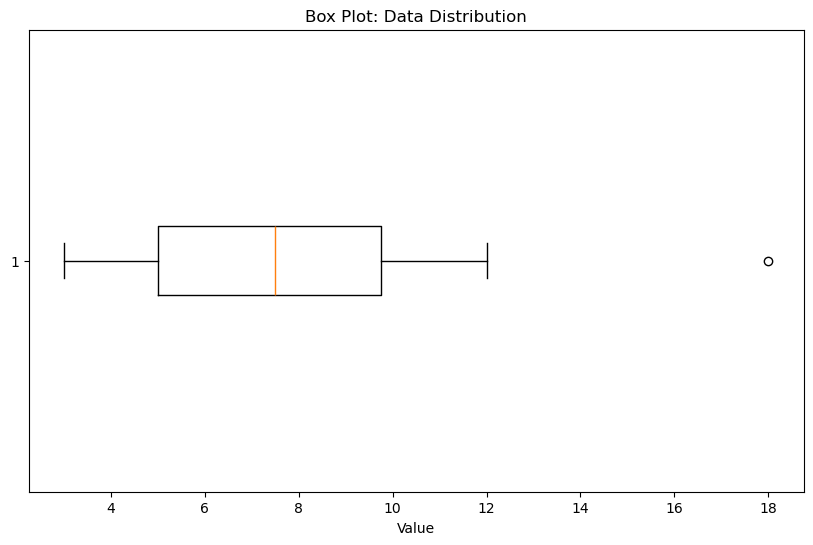

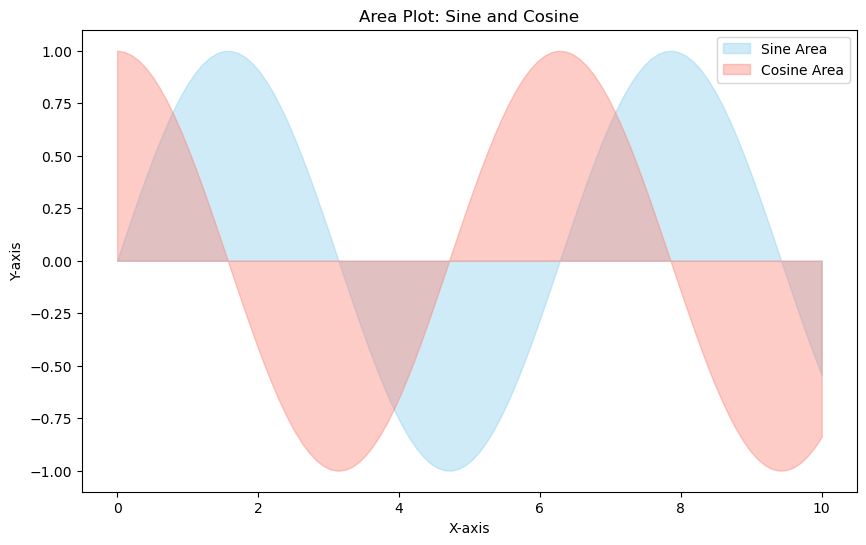

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)
categories = ['A', 'B', 'C', 'D']
values = [10, 15, 7, 20]
data = [3, 12, 5, 18, 5, 7, 8, 9]

# 1. Line Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sine Wave', color='blue', linewidth=2)
plt.plot(x, y2, label='Cosine Wave', color='red', linewidth=2)
plt.title('Line Plot: Sine and Cosine Waves')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

# 2. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Sine Points', color='purple', alpha=0.5)
plt.title('Scatter Plot: Sine Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

# 3. Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='green')
plt.title('Bar Plot: Category Values')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# 4. Histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=5, color='orange', alpha=0.7)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 5. Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 6. Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title('Box Plot: Data Distribution')
plt.xlabel('Value')
plt.show()

# 7. Area Plot
plt.figure(figsize=(10, 6))
plt.fill_between(x, y, color='skyblue', alpha=0.4, label='Sine Area')
plt.fill_between(x, y2, color='salmon', alpha=0.4, label='Cosine Area')
plt.title('Area Plot: Sine and Cosine')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()



# 5. Compare between advantages of seaborn and illustrate the role of controlling figure aesthetics using seaborn with a code snippet

---

#### Seaborn is a powerful visualization library in Python that builds on Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. Below are some advantages of using Seaborn compared to Matplotlib, along with a code snippet illustrating how to control figure aesthetics.

### Advantages of Seaborn Over Matplotlib

1. **Simplified Syntax**: Seaborn’s API is more user-friendly, allowing complex visualizations with fewer lines of code. It automatically manages many aspects like axis settings and legend placements.

2. **Statistical Functions**: Seaborn integrates statistical visualizations, making it easy to depict distributions, trends, and relationships.

3. **Enhanced Default Aesthetics**: The default themes and styles in Seaborn are visually appealing, providing options like `darkgrid` and `whitegrid` without extensive customization.

4. **Integration with Pandas**: Seaborn directly works with Pandas DataFrames, facilitating straightforward plotting of tabular data.

5. **Advanced Plot Types**: It supports specialized plot types (e.g., violin plots, pair plots, heatmaps) not readily available in Matplotlib.

### Code Snippet: Controlling Figure Aestheticsand styles.

---


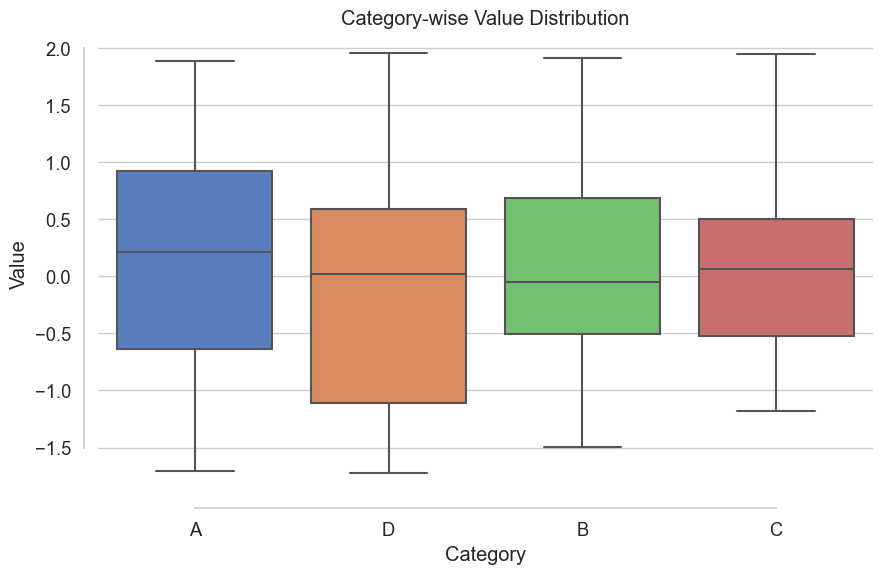

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset
np.random.seed(0)
df = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'Value': np.random.normal(0, 1, 100)
})

# Set the aesthetic style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=df)
sns.despine(offset=10, trim=True)
plt.title('Category-wise Value Distribution')
plt.show()

This snippet demonstrates Seaborn's ability to enhance plot aesthetics through sns.set, which adjusts the style, color palette, and font sizes for a cohesive look. The sns.despine function removes the top and right borders, adding to the minimalist and modern aesthetic, while the muted color palette keeps visual elements subtle yet distinctive.

Seaborn thus provides powerful tools to control and enhance figure aesthetics, making it ideal for producing visually engaging, insightful, and professional visualizations with minimal code.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


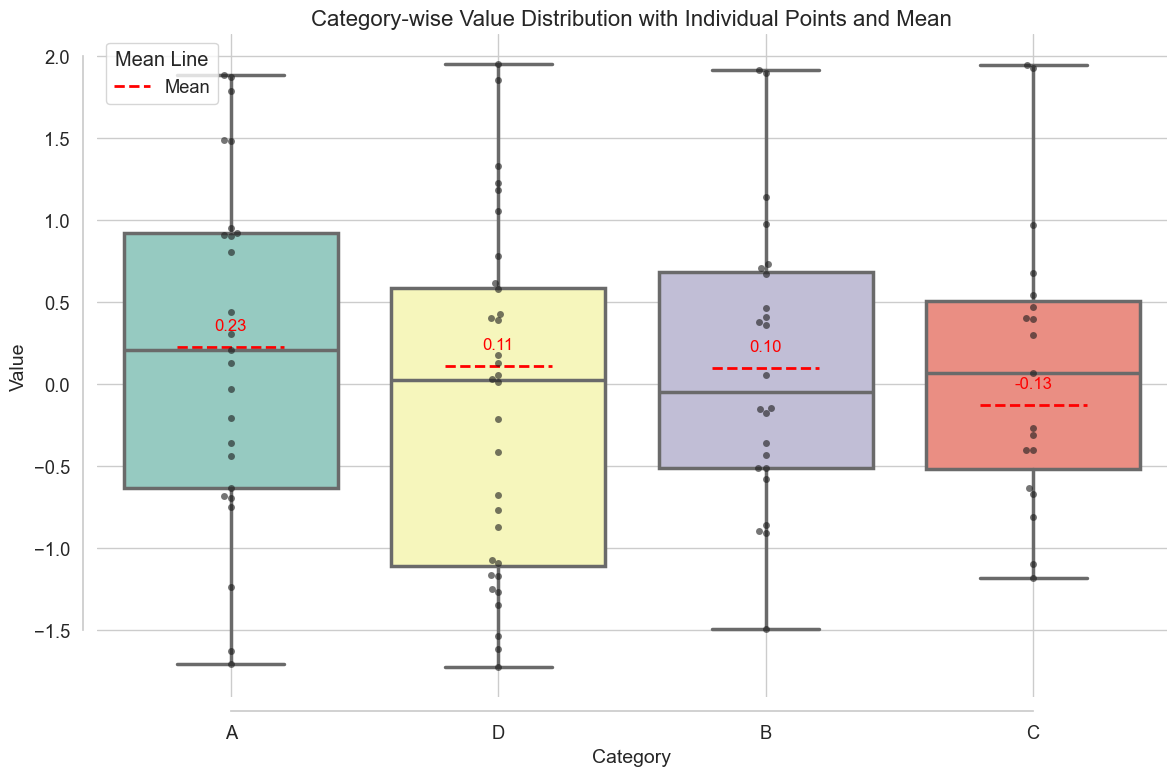

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset
np.random.seed(0)
df = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'Value': np.random.normal(0, 1, 100)
})

# Set the aesthetic style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Create the box plot
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='Category', y='Value', data=df, 
                       palette='Set3', linewidth=2.5, fliersize=5)

# Overlay swarm plot for individual data points
sns.swarmplot(x='Category', y='Value', data=df, color='k', alpha=0.6)

# Calculate mean values for each category
mean_values = df.groupby('Category')['Value'].mean().reset_index()

# Add mean lines to the box plot
for i in range(len(mean_values)):
    plt.hlines(mean_values['Value'][i], xmin=i-0.2, xmax=i+0.2, color='red', 
               linestyle='--', lw=2, label='Mean' if i == 0 else "")

# Annotate mean values on the plot
for index, row in mean_values.iterrows():
    plt.text(index, row['Value'] + 0.1, f'{row["Value"]:.2f}', 
             color='red', ha='center', fontsize=12)

# Add additional styling
sns.despine(offset=10, trim=True)
plt.title('Category-wise Value Distribution with Individual Points and Mean', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Mean Line', loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Breakdown of Aesthetic Control in the Code

- **Theme Settings**: The `sns.set()` function controls the overall style and color palette.
- **Figure Size**: `plt.figure(figsize=(12, 8))` adjusts the size of the plot for better visibility.
- **Font Scale**: The `font_scale` parameter increases text size for improved readability.
- **Color Palette**: The `palette` parameter in `sns.boxplot()` provides a visually distinct color scheme.
- **Spine Removal**: `sns.despine()` enhances the minimalist look by removing unnecessary borders.
- **Annotations and Labels**: Titles, axis labels, and legends are customized for clarity.


### Conclusion

Seaborn's user-friendly design and powerful aesthetic controls make it an excellent choice for statistical visualizations. This capability allows users to create visually engaging and informative plots that effectively communicate insights from data. 
This capability allows data scientists and analysts to present their findings effectively, improving comprehension and engagement with the visualized data.